In [1]:
import requests

## signup

In [4]:
q = requests.post("http://localhost:4500/captcha",json={"type":"signup"})

In [5]:
q.json()

{'message': {'captcha_id': 'a703164d-4ef1-47a2-975a-f41e1e916bd0',
  'content': 'iVBORw0KGgoAAAANSUhEUgAAAIwAAAAoCAYAAAAsTRLGAAAE2ElEQVR4nO1bT0gUURj/XgUeWtHDRiWSwSIpsZc8CB46eBJBMAhNwoPbKZC6eShIKcEgBVHwLgiRCBYEXUUQIoRKFlylWhREqD0YWrAdeh2GaefP+/O9eTM7M+v84OH43vu+7/fe/OZ7b/4soZRScIAQQpx1CRIAABCWYNDGibBOHQgAgI5oUEESYdUMqiIYLBJhRR+REgwWibDCw/+Jj5toMEiE5T9qWjBYJMLCIxGMAhJhWQQDkIjGL9SysM6ETQADQiqlvT1sNnJQJMLm6QWRzjCY61TEmBBxe1wQpYzlKcNkMgBtbQAbG37TqWBvz/4/pUbZ3LTXEwLQ3Mz3Y81OrBIHQblS08pKaBnLpVxZYJHWWZbZLEA+7+3EmLFkWUQUH3ttyvi9ewfw8yfAnTs4f4FCQ+m62Uopw1hD/foF0NPjbv/2zV43Nma3dV7h09OqlO2wztuLF+J+rGLlLkJvL8DQkJ17AhBv2MxpXl8Xtzu98E8Xu7/T7vNnEStKZ2Yqfe/dY/v4+JFvXyqJefT3sznPzIh5BQIASnt6NMz1wLxORI4xy4QTLS0A+/tW/25/PJ+ydhlOTgDq63H2orF5Gbfv8ImEzrKkvOn98cMMik/L1g2sc6zWpYHlzyku0QaXhVRKrT8AQKGgblM1hLxLVxZMOl0RDYB9Tf/9W5+QTDQHB5V4z57px2Mhl7PzsXJ6+DCYmLEHZj3M5fB7ErO+XBatr0ZZW+P3uX6dHe/iRb7N6KjRZ3ZWPJ6pKTf/y5dxe7ChIbFvLXz/Lt5keUAogrHi7FmxaN6/l4/5wwf8vLx5wz5xN26w+/NOdGcnpcUipfk8fhPu7CfjXC77cL59FIvhroqCkQ3ebJ+


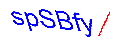

In [6]:
%%html
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAIwAAAAoCAYAAAAsTRLGAAAE2ElEQVR4nO1bT0gUURj/XgUeWtHDRiWSwSIpsZc8CB46eBJBMAhNwoPbKZC6eShIKcEgBVHwLgiRCBYEXUUQIoRKFlylWhREqD0YWrAdeh2GaefP+/O9eTM7M+v84OH43vu+7/fe/OZ7b/4soZRScIAQQpx1CRIAABCWYNDGibBOHQgAgI5oUEESYdUMqiIYLBJhRR+REgwWibDCw/+Jj5toMEiE5T9qWjBYJMLCIxGMAhJhWQQDkIjGL9SysM6ETQADQiqlvT1sNnJQJMLm6QWRzjCY61TEmBBxe1wQpYzlKcNkMgBtbQAbG37TqWBvz/4/pUbZ3LTXEwLQ3Mz3Y81OrBIHQblS08pKaBnLpVxZYJHWWZbZLEA+7+3EmLFkWUQUH3ttyvi9ewfw8yfAnTs4f4FCQ+m62Uopw1hD/foF0NPjbv/2zV43Nma3dV7h09OqlO2wztuLF+J+rGLlLkJvL8DQkJ17AhBv2MxpXl8Xtzu98E8Xu7/T7vNnEStKZ2Yqfe/dY/v4+JFvXyqJefT3sznPzIh5BQIASnt6NMz1wLxORI4xy4QTLS0A+/tW/25/PJ+ydhlOTgDq63H2orF5Gbfv8ImEzrKkvOn98cMMik/L1g2sc6zWpYHlzyku0QaXhVRKrT8AQKGgblM1hLxLVxZMOl0RDYB9Tf/9W5+QTDQHB5V4z57px2Mhl7PzsXJ6+DCYmLEHZj3M5fB7ErO+XBatr0ZZW+P3uX6dHe/iRb7N6KjRZ3ZWPJ6pKTf/y5dxe7ChIbFvLXz/Lt5keUAogrHi7FmxaN6/l4/5wwf8vLx5wz5xN26w+/NOdGcnpcUipfk8fhPu7CfjXC77cL59FIvhroqCkQ3ebJ+bU7PD9hHZyTKcrAwPq3OTCW1rS1Mw3d21IRiMaGR1MjtMLJb94iIu9vY2pVeu2OM8fcr2PTsrF83Xr+628XENwdy8aRiOjHgw5sN3wchEU1fHn4S/f9lt8/N4oT144K7r6sJOhvikYmxly5KfbShCAcCLJoQ3xjKnXl4OYp+78Owww9T18epV5RWAig/e2FIp48k4JjbTaUAJwcvzGK3PG0z5s9DRIR+n9Za8oUEsQPM1BCEAq6s4fq9fs+s/fRLbDQ5WjpeX7W3nzxt/L11y2/HGa4plclIc14U4vn/wOw1mMvw9ilnq69m2X77Y+7Fu0R89qrQ3Ntrbjo+97Yew9bx287ZeaTbfvjUMBgYUjNQRecEYJN2Tt7REaV+f8cgBay8r2NgqPDE+nBzM41u3cHH/G+XzCgbeEFvB6Phxltu3KT06wtm0tlK6syPux2t78kTOzXmsNLgqwHfBBCEacwKfP/fbMz62ShH5wcSamDD+vnypSPLPH6WxeUXkBbO7G+jdohIKBUqvXmULZWGBb4fhn0rJhcd1XkWoaOGc7+pC4OgojKhsXLsGUCx6txfd9R4fx/NGRwSt4aiq8zSiVAK4cME4Rs1WCB/eqDyP0cow2ECnWVjptEJn8/vWKk8XpZRiz2WkEmatCgudNEL8GQNWMJH6IRtBImyeMty9C/D4sXF8/76icTbrOx8/EfnJ10FYGevwEKCpyV0vZBOBj4YxF2NNCwaLoISl+wF7tZEIxmfU6h7LRCKYkBBnYclEkwgmRERRWDLB/AMeJoHwy30V/gAAAABJRU5ErkJggg==">

In [7]:
q = requests.post("http://localhost:4500/auth/signup",
                  json={"username":"hsz",
                        "password":"hsz",
                        "main_email":"hsz1273327@gmail.com",
                        "captcha_id":'a703164d-4ef1-47a2-975a-f41e1e916bd0',
                        "captcha_code":"spSBfy"
                       }
                 )

In [8]:
q.json()

{'result': True}

In [9]:
q = requests.post("http://localhost:4500/auth/signup/ajax/username",
                  json={"username":"hsz"}
                 )

In [10]:
q.json()

{'message': '用户已存在', 'result': False}

In [11]:
q = requests.post("http://localhost:4500/auth/signup/ajax/main_email",
                  json={"main_email":"hsz@123.com"}
                 )

In [12]:
q.json()

{'message': 'email可用', 'result': True}

# auth

## /

In [37]:
q = requests.post("http://localhost:4500/auth",json={"username":"admin","password":"admin"})

In [38]:
q.json()

{'message': 'eyJfaWQiOiI3YzMzMDVlYS05N2EwLTQ4MzQtODM0Zi03NWNkYTVmYWQxYmQiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHTJkw.ySGGX9osMVldU6E8p19T0R3wwP0'}

In [39]:
q = requests.post("http://localhost:4500/auth",json={"username":"hsz","password":"hsz"})

In [40]:
q.json()

{'message': 'eyJfaWQiOiIzM2MyODAwMi1mYjk4LTQ0NjMtYmM3Zi1mZmY0NWM0ODVhZjQiLCJyb2xlcyI6W119.DHTJlg.bvf8uQISfREyB_Y8jJMMuyVBrwY'}

# api-role

## rolelist

admin实际token

eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA

hsz实际token

eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM

### get with service_name

In [201]:
q = requests.get("http://localhost:4500/api/role",params={"service_name":"auth-center"},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [202]:
q.json()

{'message': True}

### get 

In [203]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [204]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'}]}}

### post

字段错误

In [205]:
q = requests.post("http://localhost:4500/api/role",
                  json={"roles":[{"name":"abc"}]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [206]:
q.json()

{'error': '\'"name" is not a recognized field.\'', 'message': '数据库错误'}

正确

In [207]:
q = requests.post("http://localhost:4500/api/role",
                  json={"roles":[{"service_name":"abc"}]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [208]:
q.json()

{'result': True}

In [209]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [210]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'},
   {'servicename': 'abc'}]}}

### delete

In [211]:
q = requests.delete("http://localhost:4500/api/role",
                  json={"service_name":"abc"},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [212]:
q.json()

{'result': True}

In [213]:
q = requests.get("http://localhost:4500/api/role",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [214]:
q.json()

{'message': {'rolelist': [{'servicename': 'auth-center'},
   {'servicename': 'msg_reverse_indexing'}]}}

# api-user

### get

In [215]:
q = requests.get("http://localhost:4500/api/user",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [216]:
q.json()

{'userlist': [{'_id': '988187c2-0ca1-45e3-afb7-cd32a60a5df6',
   'main_email': 'huangsizhe@rongshutong.com',
   'roles': ['auth-center', 'msg_reverse_indexing'],
   'username': 'admin'},
  {'_id': 'bf9c2773-8716-4314-941c-eff9e2c36dc0',
   'main_email': 'hsz1273327@gmail.com',
   'roles': [],
   'username': 'hsz'}]}

### post

In [217]:
q = requests.post("http://localhost:4500/api/user",
                  json={'users':[
                      {"username":"a",
                       "password":"a",
                        "main_email":"a@gmail.com"}
                  ]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [218]:
q.json()

{'result': True}

In [219]:
q = requests.get("http://localhost:4500/api/user",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [220]:
q.json()

{'userlist': [{'_id': '988187c2-0ca1-45e3-afb7-cd32a60a5df6',
   'main_email': 'huangsizhe@rongshutong.com',
   'roles': ['auth-center', 'msg_reverse_indexing'],
   'username': 'admin'},
  {'_id': 'bf9c2773-8716-4314-941c-eff9e2c36dc0',
   'main_email': 'hsz1273327@gmail.com',
   'roles': [],
   'username': 'hsz'},
  {'_id': 'fb22958a-8a01-477c-8410-be6bdd3193bd',
   'main_email': 'a@gmail.com',
   'roles': [],
   'username': 'a'}]}

### delete

In [223]:
q = requests.delete("http://localhost:4500/api/user",
                  json={'users':["fb22958a-8a01-477c-8410-be6bdd3193bd"]},
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [224]:
q.json()

{'result': True}

## api-user_role

### get

admin查看hsz

In [225]:
q = requests.get("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [226]:
q.json()

{'roles': [], 'username': 'hsz'}

admin查看admin

In [227]:
q = requests.get("http://localhost:4500/api/user/role/988187c2-0ca1-45e3-afb7-cd32a60a5df6",
                 headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [228]:
q.json()

{'roles': ['auth-center', 'msg_reverse_indexing'], 'username': 'admin'}

hsz查看hsz

In [229]:
q = requests.get("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [230]:
q.json()

{'roles': [], 'username': 'hsz'}

hsz查看admin

In [231]:
q = requests.get("http://localhost:4500/api/user/role/988187c2-0ca1-45e3-afb7-cd32a60a5df6",
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [232]:
q.status_code

401

In [233]:
q.json()

{'message': '没有权限查看'}

### post

hsz为hsz添加权限

In [234]:
q = requests.post("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                  json={"service_name":"msg_reverse_indexing"},
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [235]:
q.json()

{'message': '没有权限添加权限'}

admin为hsz添加权限

In [236]:
q = requests.post("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 json={"service_name":"msg_reverse_indexing"},
                  headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [237]:
q.json()

{'result': True}

### delete

hsz删除hsz的权限

In [238]:
q = requests.delete("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                  json={"service_name":"msg_reverse_indexing"},
                 headers={
                     "Authorization":"eyJfaWQiOiJiZjljMjc3My04NzE2LTQzMTQtOTQxYy1lZmY5ZTJjMzZkYzAiLCJyb2xlcyI6W119.DHRYDQ.Y6B1LGmo950DP3EZG1ricZO7yPM"})

In [239]:
q.json()

{'message': '没有权限删除权限'}

admin删除hsz权限

In [240]:
q = requests.delete("http://localhost:4500/api/user/role/bf9c2773-8716-4314-941c-eff9e2c36dc0",
                 json={"service_name":"msg_reverse_indexing"},
                  headers={
                     "Authorization":"eyJfaWQiOiI5ODgxODdjMi0wY2ExLTQ1ZTMtYWZiNy1jZDMyYTYwYTVkZjYiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHRX8w.NASYtsRoP3eUdyA_Aijir73A6oA"})

In [241]:
q.json()

{'result': True}

## api-user/main_email

### get

In [ ]:
q = requests.get("http://localhost:4500/api/user/role/61179587-d2a1-43f3-8626-63c469c24e8b",
                 headers={
                     "Authorization":"eyJfaWQiOiJmODMwZTg3ZS0wMGRiLTQ2NTYtYmM3MS00OTE4MjNkNzlkZWEiLCJyb2xlcyI6WyJhdXRoLWNlbnRlciIsIm1zZ19yZXZlcnNlX2luZGV4aW5nIl19.DHQuJA.oJzNr7ZZR81lfrvHNtxYR4UaFH4"})